**1.Importing Necessary Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Libraries required

import pandas as pd

import numpy as np
import io
import matplotlib.pyplot as plt

from sklearn import model_selection 
from sklearn import metrics 
import seaborn as sns 
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import ensemble 
from sklearn import tree 
from sklearn import svm
import xgboost

**2.Importing the Dataset**

In [ ]:
#import io
#data = pd.read_csv(io.BytesIO(uploaded['Dataset.csv'])

from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [ ]:
import io
data= pd.read_csv(io.BytesIO(uploaded['Dataset.csv']))

**3.Analyse the data**

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.shape

(145460, 23)

**4.Handling Missing values**


In [ ]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

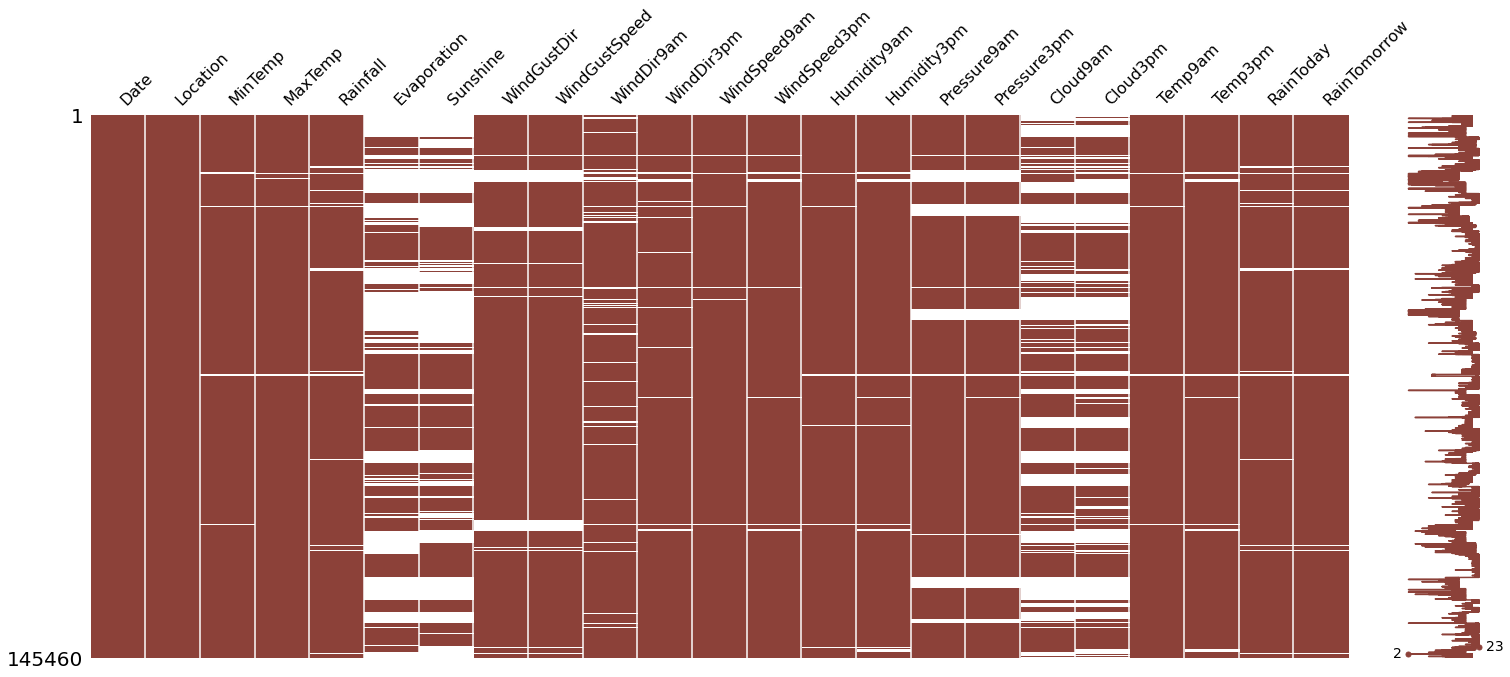

In [ ]:
import missingno as msno 
msno.matrix(data, color =(0.55, 0.255, 0.225), fontsize=16)

In [ ]:
data_cat = data [['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data_cat = data [['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)



In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Humidity9am    142806 non-null  float64
 9   Humidity3pm    140953 non-null  float64
 10  Pressure9am    130395 non-null  float64
 11  Pressure3pm    130432 non-null  float64
 12  Temp9am        143693 non-null  float64
 13  Temp3pm        141851 non-null  float64
 14  RainTomorrow   142193 non-null  object 
dtypes: float64(12), object(3)
memory usage: 16.6+ MB


In [ ]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [ ]:
cat_names=data_cat.columns


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
data_cat=imp_mode.fit_transform(data_cat)

In [ ]:
data_cat=pd.DataFrame(data_cat,columns=cat_names)


In [ ]:
data=pd.concat([data,data_cat],axis=1)


**5.Data Visualization**

In [ ]:
data.corr()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733400,0.102706,0.172553,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433147,0.897692,0.699211
MaxTemp,0.733400,1.000000,-0.074040,0.065895,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396622,0.879170,0.968713
Rainfall,0.102706,-0.074040,1.000000,0.126446,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119541,0.011069,-0.077684
WindGustSpeed,0.172553,0.065895,0.126446,1.000000,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383938,0.145904,0.031884
WindSpeed9am,0.173404,0.014294,0.085925,0.577319,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165388,0.127592,0.004476
WindSpeed3pm,0.173058,0.049717,0.056527,0.657243,0.512427,1.000000,-0.143458,0.016275,-0.277604,-0.239659,0.161060,0.027587
Humidity9am,-0.230970,-0.497927,0.221380,-0.207964,-0.268271,-0.143458,1.000000,0.659072,0.131503,0.176009,-0.469641,-0.490709
Humidity3pm,0.005995,-0.498760,0.248905,-0.025355,-0.030887,0.016275,0.659072,1.000000,-0.025848,0.048695,-0.216964,-0.555608
Pressure9am,-0.423584,-0.308309,-0.159055,-0.425760,-0.215339,-0.277604,0.131503,-0.025848,1.000000,0.959662,-0.397131,-0.265532
Pressure3pm,-0.433147,-0.396622,-0.119541,-0.383938,-0.165388,-0.239659,0.176009,0.048695,0.959662,1.000000,-0.441459,-0.360707


In [ ]:
cor=data.corr()


**Heatmap**

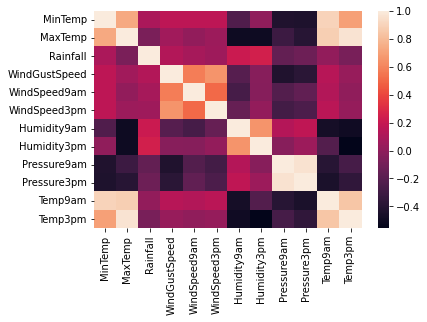

In [ ]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)


**Box plot**

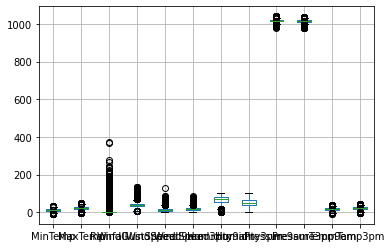

In [ ]:
data.boxplot()


**Joint Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


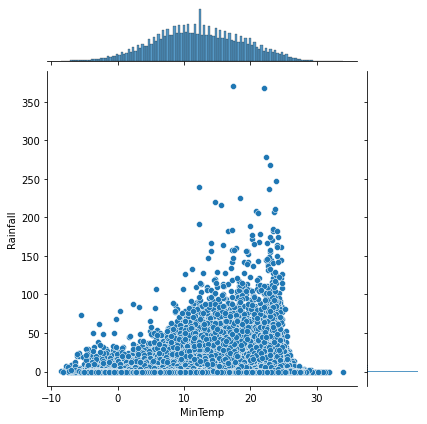

In [ ]:
sns.jointplot(data["MinTemp"],data['Rainfall'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


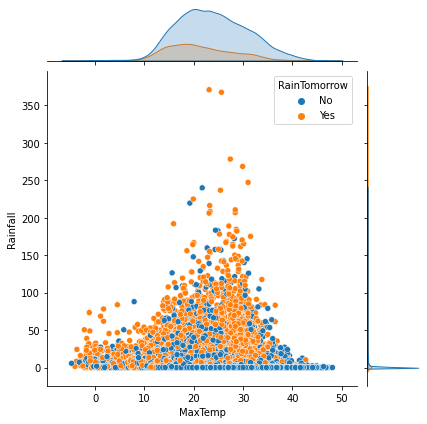

In [ ]:
sns.jointplot(data['MaxTemp'],data['Rainfall'],hue=data['RainTomorrow'])


**Histogram Plot**

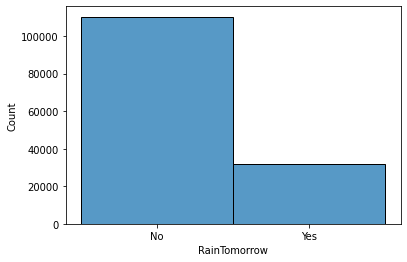

In [ ]:
sns.histplot(data['RainTomorrow'])


**Scatter Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


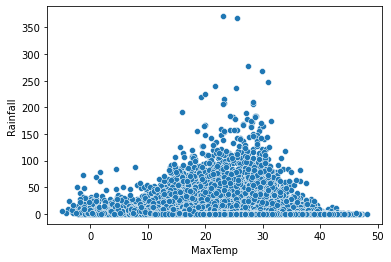

In [ ]:
sns.scatterplot(data['MaxTemp'],data['Rainfall'])


**Distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


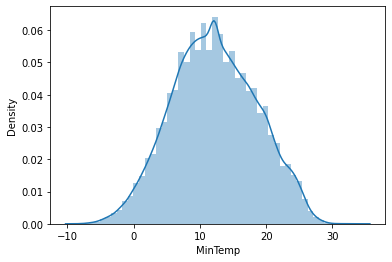

In [ ]:
sns.distplot(data['MinTemp'])


**6.Splitting**

In [ ]:
data=data[data['RainTomorrow'].notnull()]


In [ ]:
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)

In [ ]:

y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)


In [ ]:
x=x.drop('Date',axis=1)


In [ ]:
names=x.columns #Loading the names of the x_features
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc=StandardScaler()


In [ ]:
x=pd.DataFrame(x,columns=names)


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
LE = LabelEncoder()
x['Location'] = LE.fit_transform(x['Location'])
x.head()
LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()
LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()
LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()
LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,14,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,13,13,14
1,14,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,14,6,15
2,14,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,15,13,15
3,14,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,4,9,0
4,14,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,13,1,7


In [ ]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
sc=StandardScaler()


In [ ]:
x=sc.fit_transform(x)


In [ ]:
x[:5]


array([[-0.71500814,  0.1899491 , -0.04596252, -0.2077696 ,  0.30539521,
         0.67761657,  0.61479645,  0.11386682, -1.43600466, -1.47540032,
        -1.22093145, -0.01352387,  0.01642307, -0.53296232,  1.05255576,
         1.32893289,  1.36627749],
       [-0.71500814, -0.74917952,  0.26348131, -0.27900154,  0.30539521,
        -1.13007826,  0.38547865, -1.31228915, -1.28989124, -1.04553026,
        -1.1161687 ,  0.03282863,  0.38028454, -0.53296232,  1.26558231,
        -0.2215706 ,  1.58623629],
       [-0.71500814,  0.11168839,  0.34787508, -0.27900154,  0.45762138,
         0.56463565,  0.84411424, -1.6292127 , -1.04636888, -1.49022342,
        -0.98147373,  0.61996026,  0.22018549, -0.53296232,  1.47860885,
         1.32893289,  1.58623629],
       [-0.71500814, -0.46744093,  0.67138453, -0.27900154, -1.21686656,
        -0.33921177, -1.10508701, -1.25946856, -1.7282315 , -0.00791288,
        -0.36786332,  0.17188612,  0.70048263, -0.53296232, -0.86468316,
         0.4429309 

In [ ]:
x=pd.DataFrame(x,columns=names)


**Splitting the data into Train and test**

In [ ]:
from sklearn import model_selection


In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Models intilization of the models

Rand_forest = sklearn.ensemble.RandomForestClassifier()
GBM=sklearn.ensemble.GradientBoostingClassifier()



NameError: ignored

In [ ]:
#XGBoost.fit(x_train,y_train)
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()



In [ ]:
np.any(np.isnan(x))

False

In [ ]:
GBC.fit(x_train,y_train)


GradientBoostingClassifier()

In [ ]:
RFC.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
data.isnull().any()


Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainTomorrow     False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [ ]:
p1=RFC.predict(x_train)
p2=RFC.predict(x_test)
p3=GBC.predict(x_train)
p4=GBC.predict(x_test)


MODEL EVALUATIONS

In [ ]:
import sklearn.metrics as metrics


In [ ]:
print(metrics.accuracy_score(y_train,p1))


0.9999384637023753


In [ ]:
print("RandomForestClassifier",metrics.accuracy_score(y_test,p2))
print("GradientBoostingClassifier",metrics.accuracy_score(y_test,p4))


RandomForestClassifier 0.8554801504975562
GradientBoostingClassifier 0.8505924962199796


In [ ]:
import pickle


In [ ]:
pickle.dump(RFC,open('rainfall.pkl','wb'))
pickle.dump(LE,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('imputer.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))